In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np



def get_all_datasets(hdf_file):
    datasets = {}

    def collect_datasets(name, obj):
        if isinstance(obj, h5py.Dataset):
            datasets[name] = obj[:]

    hdf_file.visititems(collect_datasets)
    return datasets

def nice_dict_contents(data_dict, print_keys=False):
    outer_keys = {}
    for key in data_dict.keys():
        num_levels = len(key.split('/'))
        outer = key.split('/')[0]
        if num_levels == 2:
            inner = key.split('/')[1]
            if outer not in outer_keys.keys():
                outer_keys[outer] = []
            outer_keys[outer].append(inner)
        else:
            middle = key.split('/')[1]
            inner = key.split('/')[2]
            if outer not in outer_keys.keys():
                outer_keys[outer] = {}
            if middle not in outer_keys[outer].keys():
                outer_keys[outer][middle] = []
            outer_keys[outer][middle].append(inner)


    if print_keys:
        print('CONTENTS OF HDF5 FILE:')
        for key, v in outer_keys.items():
            print(key)
            if isinstance(v, list):
                #for i in v:
                print('\t', ', '.join(v))
            else:
                for k, v in v.items():
                    print('\t', k)
                    #for i in v:
                    print('\t\t', ', '.join(v))

def load_data(file_path='C:/Users/Chris Bhysicisd/Desktop/Applied machine learning/final project/a000_1/data.hdf5', verbose=False):
    with h5py.File(file_path, 'r') as hdf_file:
        data_dict = get_all_datasets(hdf_file)
    
    if verbose:
        nice_dict_contents(data_dict, print_keys=True)

    return data_dict


In [2]:

# Function definitions for get_all_datasets and nice_dict_contents

def load_data(file_path='C:/Users/Chris Bhysicisd/Desktop/Applied machine learning/final project/a000_1/data.hdf5', verbose=False):
    with h5py.File(file_path, 'r') as hdf_file:
        data_dict = get_all_datasets(hdf_file)
    
    if verbose:
        nice_dict_contents(data_dict, print_keys=True)

    return data_dict

# # Load the data_dict using the load_data function
data_dict = load_data('C:/Users/Chris Bhysicisd/Desktop/Applied machine learning/final project/a000_1/data.hdf5')

In [3]:
# def print_data(data_dict):
#     for key, dataset in data_dict.items():
#         print(f"Dataset: {key}")
#         print(dataset)

# # Assuming you have already loaded the data_dict using the load_data function
# # Call the print_data function to print the data
# print_data(data_dict)

In [4]:
a = data_dict['pose/tango_ori']
b = data_dict['synced/acce']
c = data_dict['pose/tango_pos']


In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate dummy IMU dataset
accelerometer_data = b  # Shape: (samples, 3)
tango_ori_data = a # Shape: (samples, 3)
positions = c  # Shape: (samples, 3)


In [6]:
data = np.concatenate((accelerometer_data, tango_ori_data), axis=1)  

In [7]:
# Convert the NumPy array into a pandas DataFrame
dfX = pd.DataFrame(data)
dfy = pd.DataFrame(c)

In [8]:
X = dfX
y = dfy

In [9]:
X

,0,1,2,3,4,5,6
0,-9.700169,0.471337,-0.441863,0.344367,0.590408,0.350964,-0.640043
1,-9.698935,0.473029,-0.444046,0.344410,0.590427,0.350965,-0.640001
2,-9.687126,0.468072,-0.453906,0.344450,0.590441,0.350953,-0.639974
3,-9.691151,0.468536,-0.463545,0.344484,0.590450,0.350923,-0.639964
4,-9.716065,0.461727,-0.427714,0.344519,0.590454,0.350882,-0.639964
...,...,...,...,...,...,...,...
67605,-9.787225,0.567309,1.480200,0.503840,-0.511118,0.564981,0.407064
67606,-9.845543,0.553037,1.464559,0.503748,-0.511204,0.565016,0.407021
67607,-9.837434,0.509035,1.467338,0.503645,-0.511297,0.565062,0.406969
67608,-9.812098,0.523998,1.470545,0.503531,-0.511391,0.565120,0.406909


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
import pandas as pd

In [12]:
ct = make_column_transformer(
    (StandardScaler(), list(X.columns)),
    remainder='passthrough'
    )

ct.fit(X_train)
ct.transform(X_train)
ct.transform(X_test)
ct.transform(X_valid);


In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [14]:
model.compile(loss = tf.keras.losses.mean_absolute_error,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid))

Epoch 1/100


C:\Users\Chris Bhysicisd\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1353/1353 [==============================] - 4s 2ms/step - loss: 7.0639 - mae: 7.0639 - val_loss: 6.9708 - val_mae: 6.9708
Epoch 2/100
1353/1353 [==============================] - 3s 2ms/step - loss: 7.0111 - mae: 7.0111 - val_loss: 6.9481 - val_mae: 6.9481
Epoch 3/100
1353/1353 [==============================] - 3s 2ms/step - loss: 6.9987 - mae: 6.9987 - val_loss: 6.9321 - val_mae: 6.9321
Epoch 4/100
1353/1353 [==============================] - 3s 2ms/step - loss: 6.9645 - mae: 6.9645 - val_loss: 6.8955 - val_mae: 6.8955
Epoch 5/100
1353/1353 [==============================] - 3s 2ms/step - loss: 6.9175 - mae: 6.9175 - val_loss: 6.8377 - val_mae: 6.8377
Epoch 6/100
1353/1353 [==============================] - 3s 2ms/step - loss: 6.8815 - mae: 6.8815 - val_loss: 6.8367 - val_mae: 6.8367
Epoch 7/100
1353/1353 [==============================] - 3s 2ms/step - loss: 6.8663 - mae: 6.8663 - val_loss: 6.8144 - val_mae: 6.8144
Epoch 8/100
1353/1353 [==============================] - 3s 2ms/ste

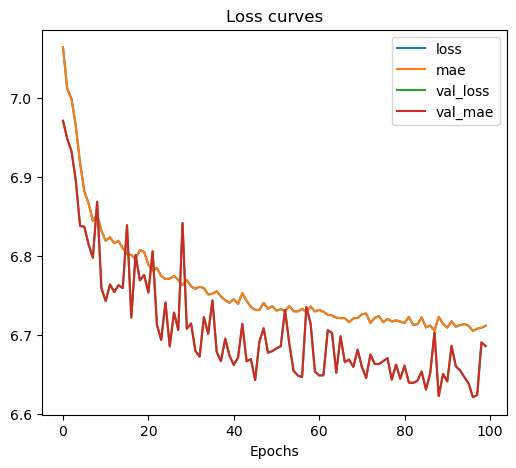

In [15]:
pd.DataFrame(history.history).plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title('Loss curves')
plt.legend();

ValueError: x and y must be the same size

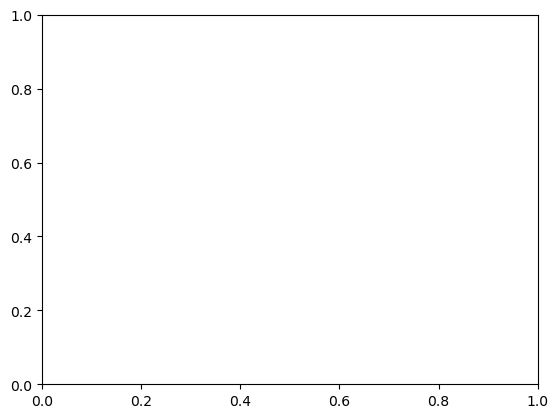

In [16]:
plt.figure()
plt.scatter(range(len(y_test)),y_test,color='red',label='Actual Values')
plt.scatter(range(len(y_pred)),y_pred,color='blue',label='Predicted Values')
plt.title('Actual vs Predicted')
plt.legend();